# Explore GLIMS data

Author: Ann Windnagel

Date: 02/19/2019

This notebook opens up GLIMS shapefiles and explores the data. See http://www.glims.org/ for information about GLIMS and to download the data.

### Import Python Packages

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd

import earthpy as et

# set working dir
os.chdir(os.path.join(et.io.HOME, "git/wgms-glacier-project"))

In [2]:
# Open GLIMS polygons using geopandas
glims_file_path = "data/glims/raw/glims_download_07040/glims_polygons.shp"
glims_polygons = gpd.read_file(glims_file_path)

In [3]:
# Quick look at the data
glims_polygons.head()

,line_type,anlys_id,glac_id,anlys_time,area,db_area,width,length,primeclass,min_elev,...,subm_id,release_dt,proc_desc,rc_id,geog_area,chief_affl,parent_id,submitters,analysts,geometry
0,glac_bound,101215.0,G286929E46788S,2012-04-20T00:00:00,12.4259,12.4292,0.0,4786.66,0.0,0.0,...,559.0,2012-08-24T08:41:13,Analysis of pre-processed Landsat images; 2. ...,565.0,Antarctic Peninsula,Aberystwyth University,None,"Davies, Bethan","Davies, Bethan","POLYGON Z ((-73.062957 -46.755129 0, -73.06091..."
1,intrnl_rock,101146.0,G286719E46755S,2012-04-20T00:00:00,80.2842,80.3127,0.0,10225.60,0.0,0.0,...,559.0,2012-08-24T08:41:13,Analysis of pre-processed Landsat images; 2. ...,565.0,Antarctic Peninsula,Aberystwyth University,None,"Davies, Bethan","Davies, Bethan","POLYGON Z ((-73.307553 -46.80279 0, -73.307668..."
2,intrnl_rock,101146.0,G286719E46755S,2012-04-20T00:00:00,80.2842,80.3127,0.0,10225.60,0.0,0.0,...,559.0,2012-08-24T08:41:13,Analysis of pre-processed Landsat images; 2. ...,565.0,Antarctic Peninsula,Aberystwyth University,None,"Davies, Bethan","Davies, Bethan","POLYGON Z ((-73.24490900000001 -46.739074 0, -..."
3,intrnl_rock,101146.0,G286719E46755S,2012-04-20T00:00:00,80.2842,80.3127,0.0,10225.60,0.0,0.0,...,559.0,2012-08-24T08:41:13,Analysis of pre-processed Landsat images; 2. ...,565.0,Antarctic Peninsula,Aberystwyth University,None,"Davies, Bethan","Davies, Bethan","POLYGON Z ((-73.250113 -46.739667 0, -73.25048..."
4,intrnl_rock,101146.0,G286719E46755S,2012-04-20T00:00:00,80.2842,80.3127,0.0,10225.60,0.0,0.0,...,559.0,2012-08-24T08:41:13,Analysis of pre-processed Landsat images; 2. ...,565.0,Antarctic Peninsula,Aberystwyth University,None,"Davies, Bethan","Davies, Bethan","POLYGON Z ((-73.24113 -46.740555 0, -73.240757..."


In [4]:
# Check CRS
print(glims_polygons.crs)

{'init': 'epsg:4326'}


In [5]:
# Explore column headings
print("Number of columns:")
print(len(glims_polygons.columns))
print("Column names:")
print(list(glims_polygons))

Number of columns:
28
Column names:
['line_type', 'anlys_id', 'glac_id', 'anlys_time', 'area', 'db_area', 'width', 'length', 'primeclass', 'min_elev', 'mean_elev', 'max_elev', 'src_date', 'rec_status', 'glac_name', 'wgms_id', 'local_id', 'glac_stat', 'subm_id', 'release_dt', 'proc_desc', 'rc_id', 'geog_area', 'chief_affl', 'parent_id', 'submitters', 'analysts', 'geometry']


### Description of each GLIMS column from http://www.glims.org/MapsAndDocs/downloaded_field_desc.html
Bolded items are actually in the dataframe in the cell above.

1. **LINE_TYPE:**	Category of line segment. Possible values include: "glac_bound" (glacier boundary), "intrnl_rock" (internal rock outcrop, or nunatak), "snowline", "centerline" (center flowline of the glacier).
1. **ANLYS_ID:**	The ID assigned within GLIMS for a particular outline of a glacier at a particular time.
1. **GLAC_ID:**	The GLIMS glacier ID
1. **ANLYS_TIME:**	Representative time the analysis was carried out.
1. **AREA:**	Map-plane area of the glacier, as provided by the analyst, km2.
1. **DB_AREA:**	Map-plane area of the glacier, as calculated within the GLIMS Glacier Database, km2.
1. **WIDTH:**	Representative width of the glacier, meters.
1. **LENGTH:**	Representative length of the glacier, meters.
1. **PRIMECLASS:**	Primary WGMS classification of the glacier.
1. **MIN_ELEV:**	Elevation of the lowest part of the glacier, in meters above sea level.
1. **MEAN_ELEV:**	Mean elevation of the glacier, in meters above sea level.
1. **MAX_ELEV:**	Elevation of the highest part of the glacier, in meters above sea level.
1. **SRC_DATE:**	The as-of date for the outline. Usually the acquisition date of the image.
1. **REC_STATUS:**	Record status (should always be "okay" for downloaded data).
1. **GLAC_NAME:**	Glacier name.
1. **WGMS_ID:**	Glacier ID assigned by the World Glacier Monitoring Service.
1. **LOCAL_ID:**	An ID assigned by the GLIMS Regional Center or institution that supplied the data.
1. **SUBM_ID:**	ID assigned by GLIMS to the entire data submission.
1. RELEASE_OK	Date after which the data is released.
1. **PROC_DESC:**	Description of the processing done to create the glacier outlines.
1. SUBMIT_SUR	Surname of the person submitting the data.
1. SUBMIT_GIV	Given names of the person submitting the data.
1. SUBMIT_AFF	Affiliation of the person submitting the data.
1. SUBMIT_URL	URL for the submitting institution.
1. SUBMIT_CCO	Country code for the submitting institution.
1. ANLST_SURN	Surname of the analyst.
1. ANLST_GIVN	Given names of the analyst.
1. ANLST_AFFL	Affiliation of the analyst.
1. ANLST_URL	URL related to the analyst.
1. ANLST_CCOD	Country code for the analyst.
1. CHIEF_SURN	Surname of the chief of the Regional Center.
1. CHIEF_GIVN	Given names of the chief of the Regional Center.
1. **CHIEF_AFFL:**	Affiliation of the chief of the Regional Center.
1. RC_URL	URL for the Regional Center.
1. RC_CCODE	Country code for the Regional Center.
1. **RC_ID:**	GLIMS ID for the Regional Center.
1. **GEOG_AREA:**	Geographic region covered by the Regional Center.

These columns are in the dataframe but not described in the list above:
1. glac_stat
1. release_dt
1. parent_id
1. submitters
1. analysts
1. geometry: This is a pandas dataframe specific column

In [6]:
# number of rows x columns
glims_polygons.shape

(691372, 28)

In [7]:
# List the size of the biggest glacier by area in the GLIMS database
glims_polygons['area'].max()

105616000.0

In [8]:
# Full row of biggest glacier by area
glims_polygons.loc[glims_polygons['area'].idxmax()]

line_type                                           intrnl_rock
anlys_id                                                 336665
glac_id                                          G008032E46504N
anlys_time                                  2000-09-01T00:00:00
area                                                1.05616e+08
db_area                                                 105.608
width                                                         0
length                                                        0
primeclass                                                    0
min_elev                                                      0
mean_elev                                                     0
max_elev                                                      0
src_date                                    1850-09-01T00:00:00
rec_status                                                 okay
glac_name                             GROSSER ALETSCH GLETSCHER
wgms_id                                 

In [9]:
# Get stats about area. note that apply function supresses scientific notation
# I don't think these stats are correct... Probably due to projection differences
glims_polygons.area.describe().apply(lambda x: format(x, 'f'))

count    691372.000000
mean          0.000458
std           0.011180
min           0.000000
25%           0.000001
50%           0.000008
75%           0.000043
max           4.009078
dtype: object

In [10]:
# look for muir glacier
# This line finds all Mu* glaciers so I can see how Muir is spelled
ans = glims_polygons.loc[(glims_polygons['glac_name'] >= 'Mt') & (glims_polygons['glac_name'] < 'Mv')]
ans.glac_name.head()

5510     Munday Glacier
5511     Munday Glacier
5512     Munday Glacier
20874     Mural Glacier
20875     Mural Glacier
Name: glac_name, dtype: object

In [11]:
# This line finds Muir glacier specifically
muir_glacier = glims_polygons.loc[glims_polygons['glac_name']=='Muir Glacier']
muir_glacier[['glac_name', 'glac_id', 'src_date', 'length', 'width', 'area', 'db_area']].head()

,glac_name,glac_id,src_date,length,width,area,db_area
49544,Muir Glacier,G223569E59190N,2010-09-15T00:00:00,0.0,0.0,80.284,80.2843
49550,Muir Glacier,G223569E59190N,2010-09-15T00:00:00,0.0,0.0,80.284,80.2843
49563,Muir Glacier,G223569E59190N,2010-09-15T00:00:00,0.0,0.0,80.284,80.2843
49586,Muir Glacier,G223569E59190N,2010-09-15T00:00:00,0.0,0.0,80.284,80.2843
49622,Muir Glacier,G223569E59190N,2010-09-15T00:00:00,0.0,0.0,80.284,80.2843


In [12]:
# drop duplicates of muir
muir_glacier_nodupes = muir_glacier[['glac_name', 'src_date', 'length', 'width', 'area', 'db_area']].drop_duplicates()
muir_glacier_nodupes

,glac_name,src_date,length,width,area,db_area
49544,Muir Glacier,2010-09-15T00:00:00,0.0,0.0,80.284,80.2843
262923,Muir Glacier,2010-09-16T00:00:00,0.0,0.0,0.000,136.9210
665578,Muir Glacier,1999-08-01T00:00:00,0.0,0.0,0.000,97.9299


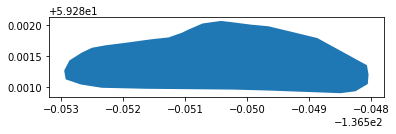

In [13]:
# Plot muir glacier outline for 2010-09-15 which is at index 49544
muir_glacier_20100915 = glims_polygons.iloc[49544:49545, :]
muir_glacier_20100915.plot()

In [14]:
muir_glacier_20100915.total_bounds

array([-136.552946,   59.2809  , -136.548039,   59.282065])

In [15]:
muir_glacier_20100915.crs

{'init': 'epsg:4326'}

In [16]:
# How do I see all the text?????? Tried options and set_option which are pandas methods but doesn't work for geopandas
#muir_glacier_20100915.options.display.max_colwidth
muir_glacier_20100915['proc_desc']

49544    Semi-automated glacier classification.; From R...
Name: proc_desc, dtype: object

In [19]:
# print area from database
print("area from database (km2):", muir_glacier_20100915['area'])
# Calculate area of muir glacier to see if it matches db_area. I need to pick an equal area crs
# These are not matching. Things look better from the RGI database in the expore-rgi notebook.
print(muir_glacier_20100915['geometry'].to_crs({'init': 'epsg:32633'}).area/10**6)
print(muir_glacier_20100915['geometry'].to_crs({'init': 'epsg:3395'}).area/10**6)
print(muir_glacier_20100915['geometry'].to_crs({'init': 'epsg:3338'}).area/10**6)
print(muir_glacier_20100915['geometry'].to_crs({'init': 'esri:102006'}).area/10**6)

area from database (km2): 49544    80.284
Name: area, dtype: float64
49544    0.027243
dtype: float64
49544    0.097806
dtype: float64
49544    0.025648
dtype: float64
49544    0.025648
dtype: float64
